In [1]:
import numpy as np
from analysis_tools.plot_BR import Plot_BR_Results
from analysis_tools.plot_KF import Plot_KF_Results
from analysis_tools.kalman import Kalman
from analysis_tools.riskanalysis import Create_KF_Experiment

########################
# File Data
########################
filename0_ = 'cluster_test_case_'
savetopath_ = './'

########################
# Bayes Risk Parameters
########################
max_it_BR_ = 1
num_randparams_ = 1
space_size_ = np.arange(-8,3)
truncation_ =20
bayes_params_ = [max_it_BR_, num_randparams_, space_size_,truncation_]

########################
# Experiment Parameters
########################
n_train_ = 2000
n_predict_ = 50
n_testbefore_ = 50
multiplier_ = 20.0 
bandwidth_ = 50.0

exp_params_ = [n_train_, n_predict_, n_testbefore_, multiplier_, bandwidth_]

########################
# Truth Parameters
########################
apriori_f_mean_ = 0.0 
alpha_ = 1.0
f0_ = 10.0
p_ = -1 #1 #-2 #-1 #0.0
J_ = 2
jstart_ = 1 # (not zero)
pdf_type_u_ = 'Uniform'
      
true_noise_params_ = [apriori_f_mean_, pdf_type_u_, alpha_, f0_, p_, J_, jstart_]

########################
# Measurement Noise 
########################
msmt_noise_mean_ = 0.0 
msmt_noise_level_ = 0.01 

msmt_noise_params_ = [msmt_noise_mean_, msmt_noise_level_]

########################
# Kalman Parameters
########################
p0_ = 10000.0 
x0_ = 1.0
optimal_sigma_ = 7.01794885056e-06
optimal_R_ = 5.20288779005e-05
b_delta_ = 0.5 

max_it_ = 1

kalman_params_ = [optimal_sigma_, optimal_R_, x0_, p0_, b_delta_]

In [2]:
Object = Kalman(filename0_, savetopath_, max_it_, exp_params_, kalman_params_, msmt_noise_params_,
                true_noise_params_, user_defined_variance=None)

BRObject = Create_KF_Experiment(bayes_params_, filename0_, savetopath_, max_it_, exp_params_, kalman_params_, msmt_noise_params_,
                true_noise_params_, user_defined_variance=None)

In [3]:
BRObject.naive_implementation(change_skip_msmts=10)

Skipped Msmts Changed from 1 to 10
cluster_test_case__kfresults_fast_skipmsmts_10
0
Time Taken for BR Map:  48.1274549961


In [4]:
mapObject = Plot_BR_Results("cluster_test_case_BR_Map.npz")

In [5]:
mapObject.load_data()

Optimal params [  5.38389562e-07   6.67968544e-01] [  5.38389562e-07   6.67968544e-01]
Prediction
Loss Minimising Point Index: 0
Optimal Hyper Parameters:  [  5.38389562e-07   6.67968544e-01]
Loss Value 917.645981621
Forecasting
Loss Minimising Point Index: 0
Optimal Hyper Parameters:  [  5.38389562e-07   6.67968544e-01]
Loss Value 1.92099696543


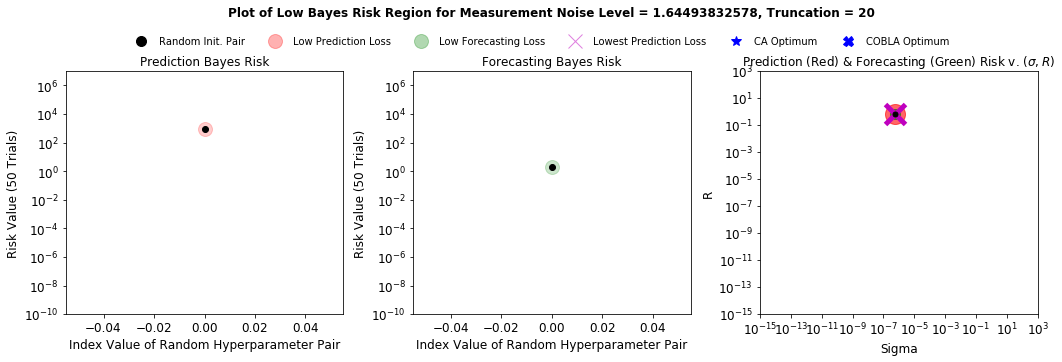

In [17]:
mapObject.make_plot()

cluster_test_case__kfresults_fast_skipmsmts_1
0


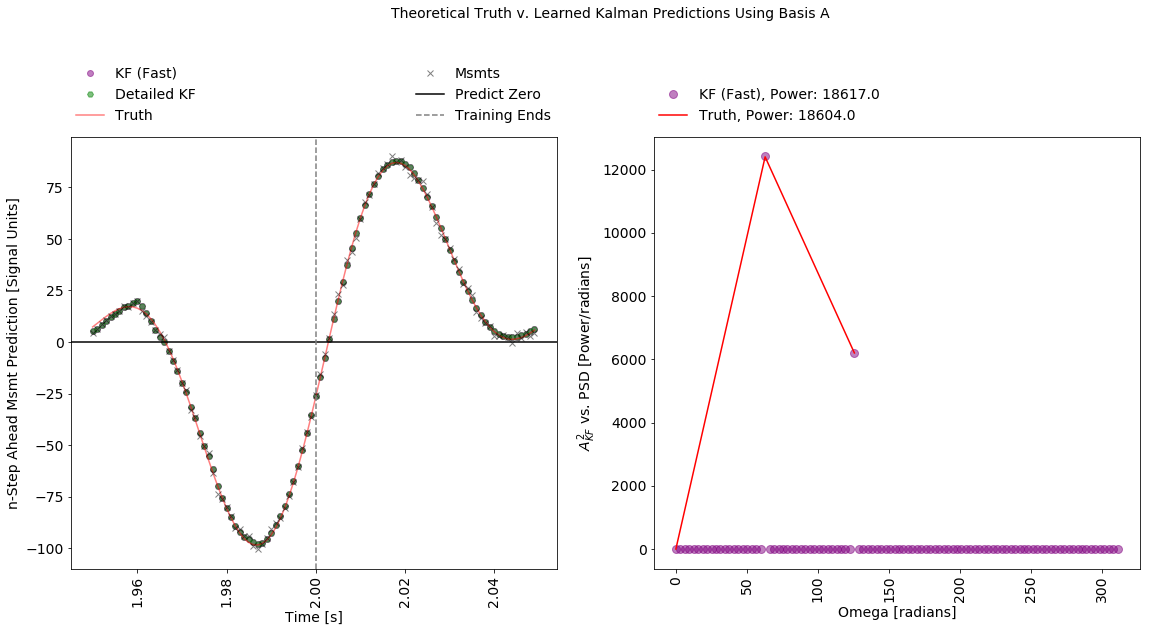

In [18]:
Object.run_test_KF()

In [19]:
Object.ensemble_avg_predictions(skip_msmts=10)

cluster_test_case__kfresults_fast_skipmsmts_10
0
cluster_test_case__kfresults_fast_skipmsmts_10
1
cluster_test_case__kfresults_fast_skipmsmts_10
0
cluster_test_case__kfresults_fast_skipmsmts_10
1
cluster_test_case__kfresults_fast_skipmsmts_10
0
cluster_test_case__kfresults_fast_skipmsmts_10
1


In [20]:
plotObject = Plot_KF_Results(exp_params_, "cluster_test_case__kfresults_skipmsmts_10.npz")

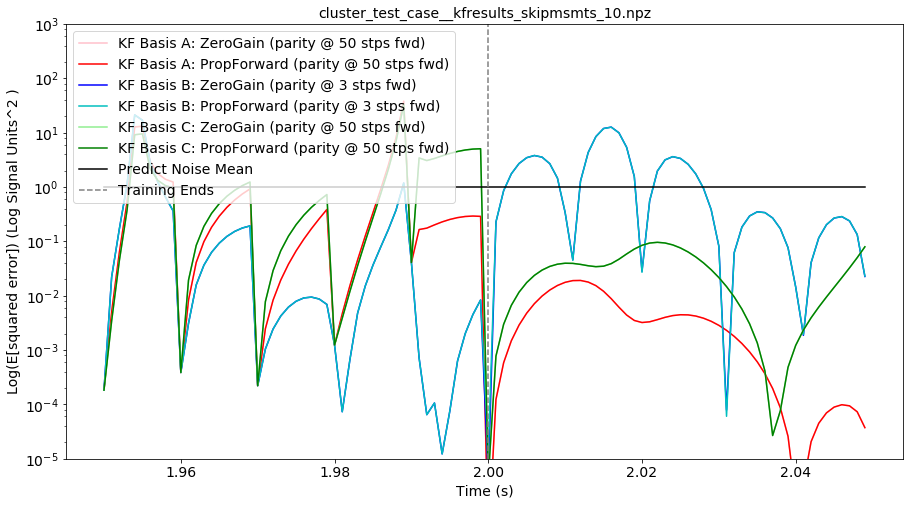

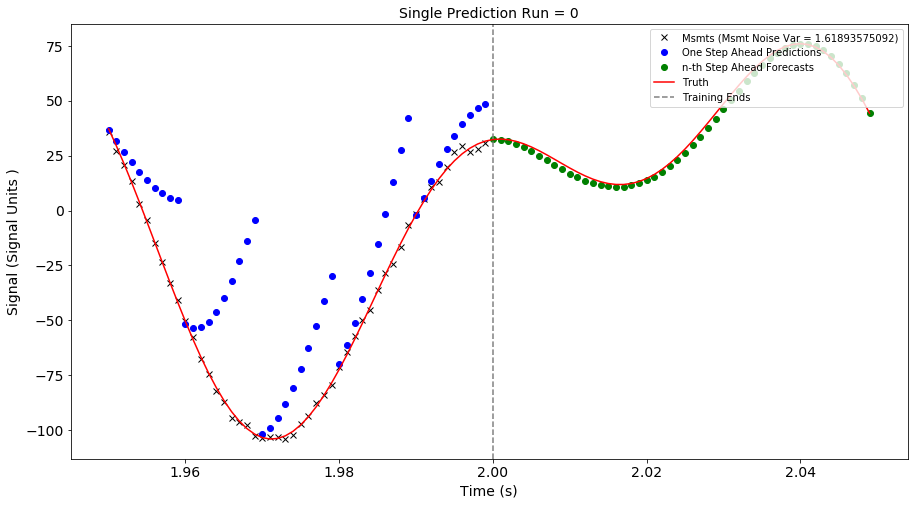

In [21]:
plotObject.make_plot()
plotObject.show_one_prediction()

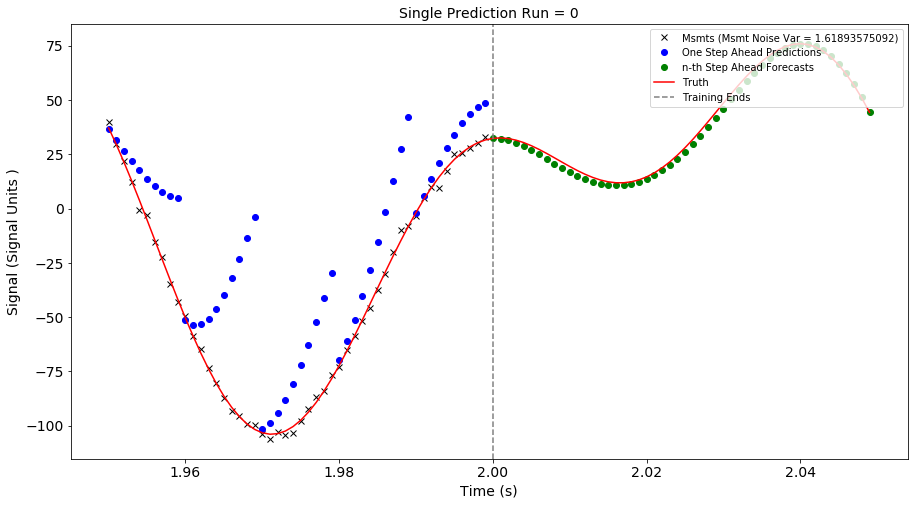

In [22]:
plotObject.show_one_prediction()

In [23]:
truth, data = Object.generate_data_from_truth(None)

In [24]:
predictions = Object.single_prediction(data, skip_msmts=10)
predictions_dkf, amplitude =  Object.detailed_single_prediction(data, skip_msmts=10)

cluster_test_case__kfresults_fast_skipmsmts_10
0


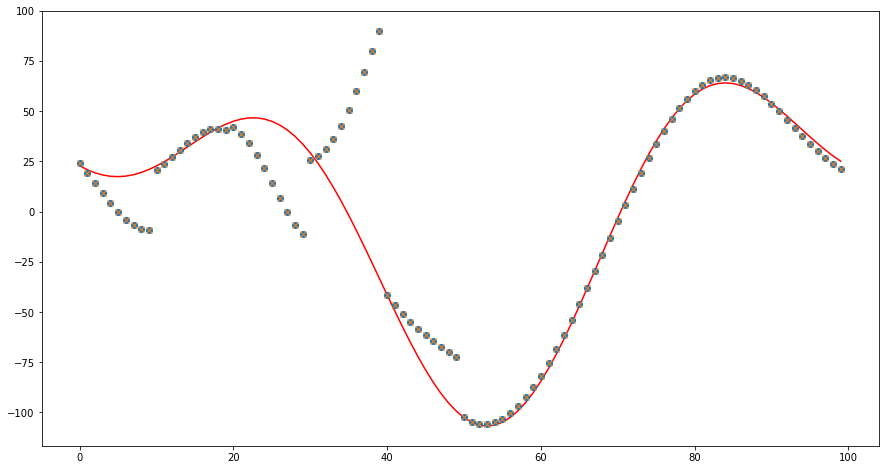

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.plot(truth[n_train_- n_testbefore_: n_train_ + n_predict_], 'r')
plt.plot(predictions, 'o')
plt.plot(predictions_dkf, 'x')
plt.show()

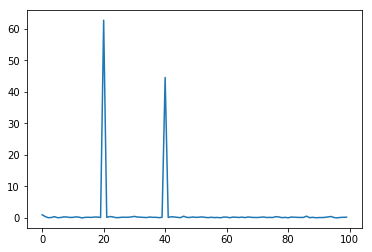

In [26]:
plt.figure()
plt.plot(amplitude)
plt.show()